In [1]:
#PLEASE DOWNLOAD THE FILE FROM "https://www.kaggle.com/datasets/deadskull7/fer2013" AND SAVE AS "fer2013.csv" TO RUN FILE SUCCESSFULLY
import pandas as pd
data = pd.read_csv('fer2013.csv')

In [2]:
import numpy as np
data['Usage'] = np.where(data['Usage']!='Training','Testing','Training')

In [3]:
data['pixels'] = data['pixels'].apply(lambda x : np.array(x.split(' ')).reshape(1,48,48))

In [4]:
X_train,Y_train = data[data['Usage']=='Training']['pixels'],data[data['Usage']=='Training']['emotion']
X_test,Y_test = data[data['Usage']=='Testing']['pixels'],data[data['Usage']=='Testing']['emotion']

In [5]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28709,) (28709,)
(7178,) (7178,)


In [6]:
data = None

In [7]:
def preprocess_features(features):
    features = np.array(features)
    features = np.concatenate(features)
    features = features.astype('float64')
    features = features / 255
    return features

In [8]:
print(X_train.shape)
print(type(X_train))
print(X_train.dtype)
X_train = preprocess_features(X_train)
print(X_train.shape)
print(type(X_train))
print(X_train.dtype)

(28709,)
<class 'pandas.core.series.Series'>
object
(28709, 48, 48)
<class 'numpy.ndarray'>
float64


In [9]:
print(X_test.shape)
print(type(X_test))
print(X_test.dtype)
X_test = preprocess_features(X_test)
print(X_test.shape)
print(type(X_test))
print(X_test.dtype)

(7178,)
<class 'pandas.core.series.Series'>
object
(7178, 48, 48)
<class 'numpy.ndarray'>
float64


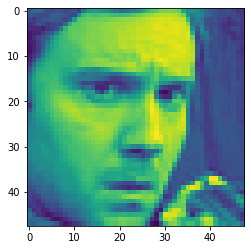

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [11]:
from tensorflow.keras.utils import to_categorical

def preprocess_targets(targets):
    return to_categorical(targets)

In [12]:
Y_train = preprocess_targets(Y_train)
Y_test = preprocess_targets(Y_test)

In [13]:
noofoutput = Y_train.shape[1]
print(noofoutput)

7


In [14]:
type(Y_train)

numpy.ndarray

## PREPROCESSED DATASETS FOR TRAINING AND TESTING

In [15]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28709, 48, 48) (28709, 7)
(7178, 48, 48) (7178, 7)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from livelossplot import PlotLossesKerasTF

In [17]:
(height,width),channels = X_train.shape[1:],1

model = Sequential()

model.add(Conv2D(64,(5,5),activation='relu',input_shape=(height,width,channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(5,5),activation='relu',input_shape=(height,width,channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu',input_shape=(height,width,channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


In [18]:
model.add(Dense(128,activation='relu',name='hidden_layer_1'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#model.add(Dense(np.ceil(RESHAPED),activation='relu',name='hidden_layer_2'))
#model.add(Dropout(0.4))

#model.add(Dense(np.ceil(RESHAPED/2),activation='sigmoid',name='hidden_layer_3'))
#model.add(Dropout(0.2))

#model.add(Dense(np.ceil(RESHAPED/4),activation='relu',name='hidden_layer_4'))
#model.add(Dropout(0.4))

#model.add(Dense(RESHAPED/4,activation='relu',name='hidden_layer_5'))
#model.add(Dropout(0.2))

model.add(Dense(noofoutput,activation='softmax',name='hidden_layer_6'))



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 18, 18, 128)      512       
 hNormalization)                                                 
                                                        

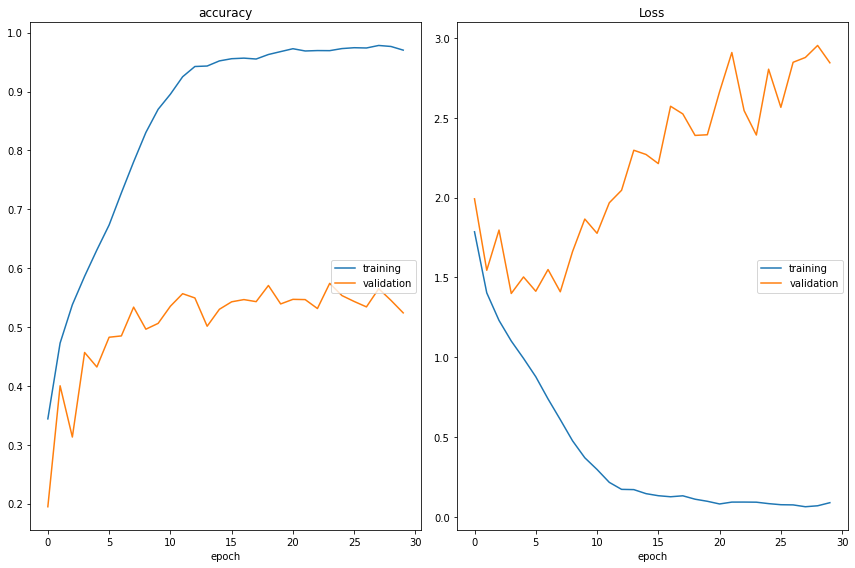

accuracy
	training         	 (min:    0.344, max:    0.978, cur:    0.970)
	validation       	 (min:    0.195, max:    0.574, cur:    0.524)
Loss
	training         	 (min:    0.064, max:    1.786, cur:    0.089)
	validation       	 (min:    1.400, max:    2.953, cur:    2.845)

319/319 [==============================] - 282s 884ms/step - loss: 0.0890 - accuracy: 0.9703 - val_loss: 2.8449 - val_accuracy: 0.5240


In [20]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

model.fit(X_train,Y_train,epochs=30,batch_size=90,validation_data=(X_test,Y_test),callbacks=[PlotLossesKerasTF()])

In [21]:
Y_pred = model.predict(X_test)

225/225 [==============================] - 20s 85ms/step


In [22]:
Y_pred = [pred.argmax() for pred in Y_pred]

In [23]:
Y_pred = pd.Series(Y_pred)

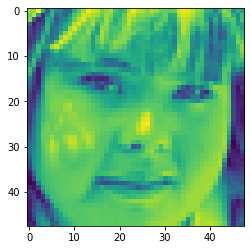

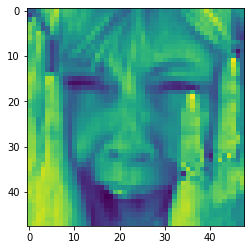

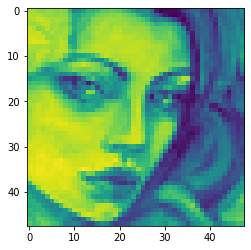

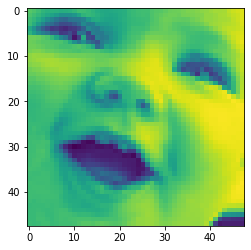

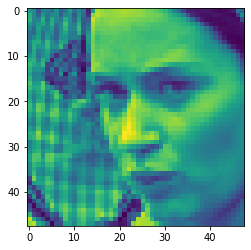

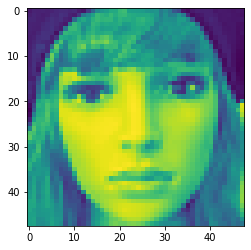

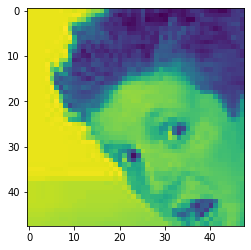

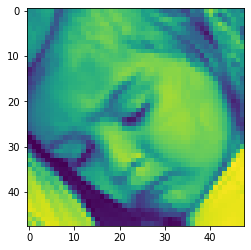

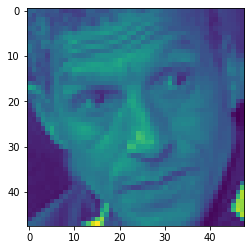

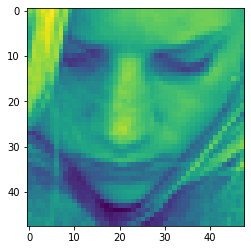

In [24]:
for idx in Y_pred[Y_pred==4].index[:10]:
    plt.imshow(X_test[idx])
    plt.show()